<h1 align="center">Проект "Разведывательный анализ данных"</h1>
<h4 align="center"><i>Выполнил студент группы DST-8 Кулушев Константин</i></h4>

### Цель проекта

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. Для этого необходимо провести анализ данных, найти связи в данных и отобрать их для построения модели. 

### Задачи проекта

* Изучить данные более детально и оценить качество
* Провести первичный анализ и обработку данных. Описать методы для работы с данными
* Провести корреляционный и статистический анализ
* Сделать общие выводы о данных и итоговый вывод по проекту

In [61]:
# импорт библиотек и визуальные настройки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from IPython.display import display, Markdown

pd.set_option('display.max_columns', 30)
plt.rcParams["figure.figsize"] = (9, 9)

In [5]:
# Читаем данные
data = pd.read_csv('stud_math.csv')
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Датасет содержит следующие признаки:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

<h2 align="center">Изучение данных и первичный анализ </h2>

Для начала посмотрим на данные в общем виде: какие типы данных присутствуют, сведения о количественных данных, сколько признаков содержат пропуски в данных.

In [133]:
display(data.info())
display(data.describe())
print(f'Количество признаков с пропусками в данных - {(data.isnull().sum() > 0).sum()}')
print(f'Количество наблюдений с пропусками в данных - {(data.isnull().sum(axis=1) > 0).sum()}')
print(f'Количество наблюдений без пропусков - {(data.isnull().sum(axis=1) == 0).sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Количество признаков с пропусками в данных - 27
Количество наблюдений с пропусками в данных - 298
Количество наблюдений без пропусков - 97


Итого в датасете содержится 30 признаков, из которых 13 признаков - количественные, и 395 наблюдений. Пропуски данных имеются в 27 признаках, включая 6 пропусков у целевой переменной, не содержат пропуски только признаки аббревиатуры школы, пола и возраста. 75% наблюдений содержат пропуски в данных, что очень много и заполнение будет зависеть от распределения признака и количества пропущенных значений наблюдения. Судя по некоторым сведениям количественных признаков, возраст учащихся от 15 до 22 лет, шкала оценки экзамена - стобалльная, присутствует неописанный в задании признак "studytime, granular", который изучим позже. Также признак количества пропущенных занятий имеет высокое максимальное значение по отношению к другим показателям, что, скорее всего, является выбросом, но подробнее выясним позже.

Далее рассмотрим каждый признак отдельно.

In [141]:
def show_na_by_rows(feature):
    """Возвращает """
    
    return data[data[feature].isnull()]

In [157]:
def check_for_anomalies(feature):
    """Проверка распределения признака на выбросы"""
    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    left_bound = Q1 - IQR*1.5
    right_bound = Q3 + IQR*1.5
    
    lt_left_bound_num = (data[feature] < left_bound).sum()
    gt_right_bound_num = (data[feature] > right_bound).sum()
    anomalies_found = lt_left_bound_num + gt_right_bound_num
    
    result_string = 'Границы выбросов [{}, {}]\nНайдено выбросов: {}'.format(left_bound, right_bound, anomalies_found)
    
    return result_string, left_bound, right_bound

In [315]:
def remove_anomalies(feature, left_bound=0, right_bound=0):
    """Удаление выбросов"""
    
    if left_bound == 0 and right_bound == 0:
        left_bound, right_bound = check_for_anomalies(feature)[1:]    
        
    result = data[feature].apply(lambda x: np.nan if x < left_bound or x > right_bound else x)
    return result

In [223]:
def plot_feature(feature):
    """Отрисовка распределения признака"""
    
    if data[feature].dtype == 'O':
        sns.countplot(x=feature, data=data, label=feature)
    else:
        sns.distplot(a=data[feature], label=feature, kde=False, bins=data[feature].nunique())

In [159]:
def print_feature_stats(feature):
    """Вывод данных о признаке"""
    
    delimiter = '-'*40
    
    display(Markdown('**Обзор признака**'))
    print(delimiter)
    
    print('Распределение значений')
    display(data[feature].value_counts())
    print(delimiter)
    
    print('Уникальных значений - {}'.format(len(data[feature].value_counts().index.to_list())))
    print(delimiter)
    
    print('Количество пропусков - {}'.format(data[feature].isnull().sum()))
    
    if data[feature].dtype == 'O':
        return
    else:
        print(delimiter)
        print(check_for_anomalies(feature)[0])

In [347]:
def get_boxplot(feature):
    """Отрисовка boxplot признака"""
    
    f = plt.figure(figsize=(17,5))
    sns.boxplot(x='score', y=feature, data=data, orient='h')

#### Признак school

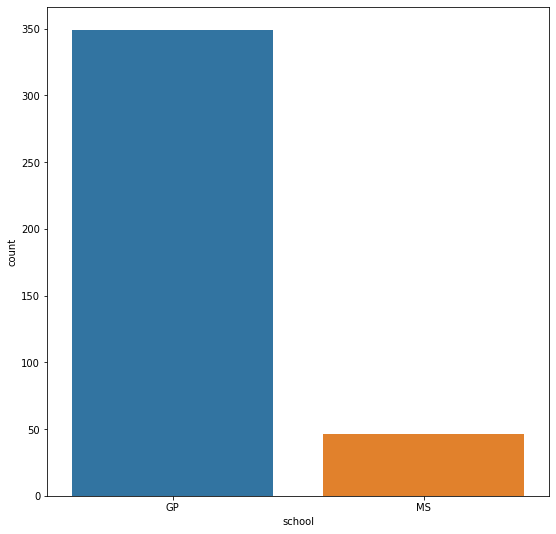

In [67]:
plot_feature('school')

In [108]:
print_feature_stats('school')

**Обзор признака**

----------------------------------------
Распределение значений


GP    349
MS     46
Name: school, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 0


Данный признак показывает аббревиатуру школы учащегося. Имеет два уникальных значения. Подавляющее число учеников посещают школу GP.

#### Признак sex

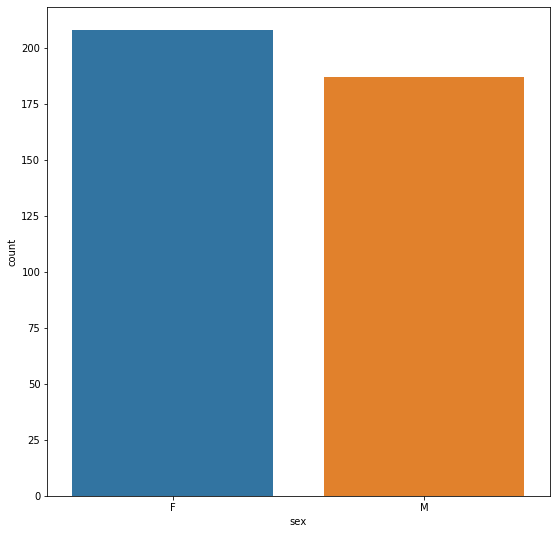

In [69]:
plot_feature('sex')

In [109]:
print_feature_stats('sex')

**Обзор признака**

----------------------------------------
Распределение значений


F    208
M    187
Name: sex, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 0


Данный признак обозначает пол учащегося. В датасете количество молодых людей и девушек практически одинаковое.

#### Признак age 

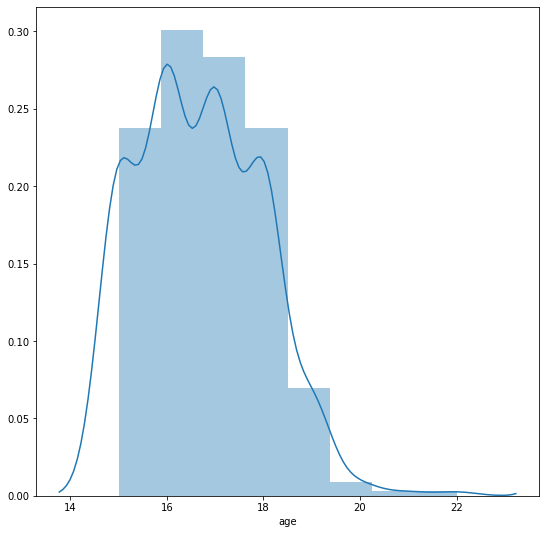

In [83]:
plot_feature('age')

In [115]:
print_feature_stats('age')

**Обзор признака**

----------------------------------------
Распределение значений


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

----------------------------------------
Уникальных значений - 8
----------------------------------------
Количество пропусков - 0
----------------------------------------
Границы выбросов [13.0, 21.0].
Найдено выбросов: 1


Признак возраста учащихся. Большинство значений находится в диапазоне от 15 до 19 лет, то есть выборка сделана в основном по ученикам младших возрастных групп. Формула интерквартильного расстояния подсказывает, что у нас есть один выброс - 22 года, но в данном случае мы можем пренебречь этим, так как, по сути, это не является экстремально высоким значением.

#### Признак address 

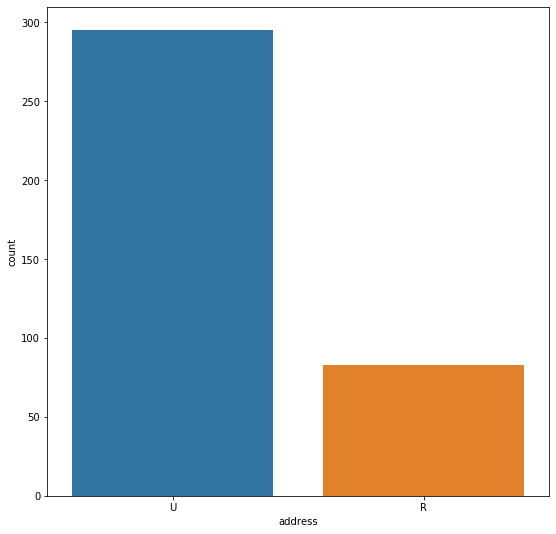

In [116]:
plot_feature('address')

In [117]:
print_feature_stats('address')

**Обзор признака**

----------------------------------------
Распределение значений


U    295
R     83
Name: address, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 17


Гораздо большее количество учащихся живут в городе, что может говорить о расположении школ в городе, а ученики, которые живут за городом, возможно, предпочитают школы, более близкие к дому (например, которые находятся в сельской местности). У 17 наблюдений неизвестен тип адреса. Исходя из графика, более вероятно, что эти ученики также живут в городе. 

#### Признак famsize 

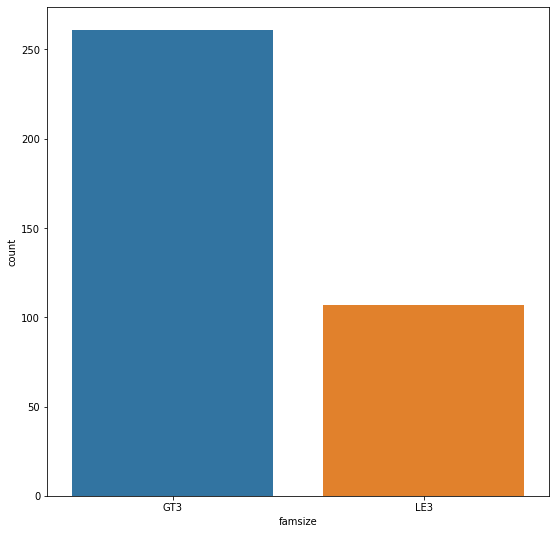

In [135]:
plot_feature('famsize')

In [136]:
print_feature_stats('famsize')

**Обзор признака**

----------------------------------------
Распределение значений


GT3    261
LE3    107
Name: famsize, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 27


Большее количество учащихся имеют семьи более трех человек. Вероятно, ученики имеют старших/младших братьев/сестер, что может сказываться на обучении (например, старшие могут обучать младших) и на итоговой оценке. Неизвестны сведения о количестве человек в семье в 27 случаях.

#### Признак Pstatus

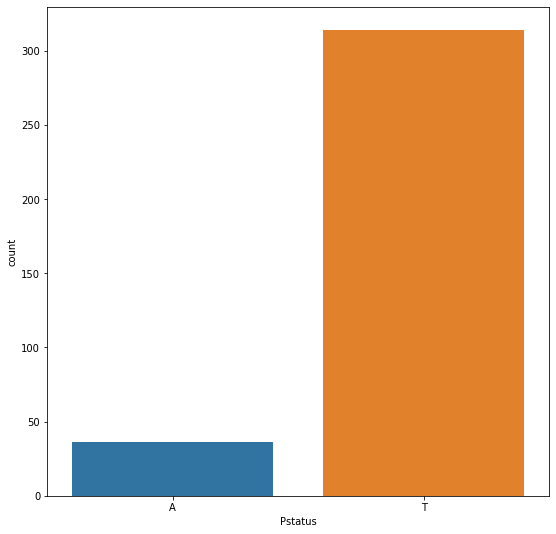

In [144]:
plot_feature('Pstatus')

In [145]:
print_feature_stats('Pstatus')

**Обзор признака**

----------------------------------------
Распределение значений


T    314
A     36
Name: Pstatus, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 45


Подавляющее большинство родителей живут вместе. 45 пропущенных значений можно заполнить значением "Т".

#### Признак Medu 

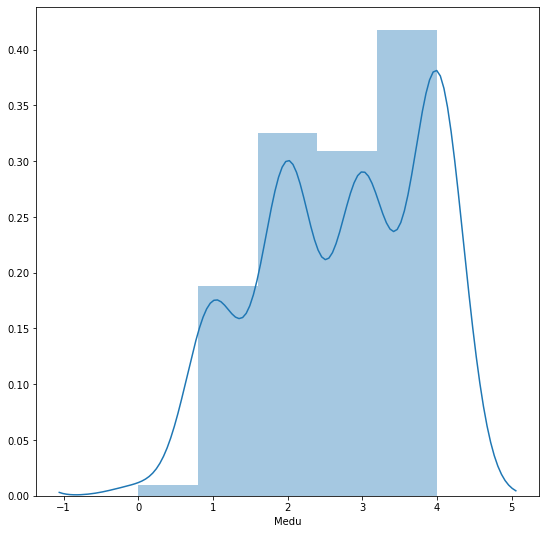

In [146]:
plot_feature('Medu')

In [147]:
print_feature_stats('Medu')

**Обзор признака**

----------------------------------------
Распределение значений


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 3
----------------------------------------
Границы выбросов [-1.0, 7.0].
Найдено выбросов: 0


Итого:
* более половины матерей имеют высшее или среднее специальное образование
* матери троих учащихся не имеют образования
* начальное образование имеют чуть менее половины матерей

Посмотрим на среднее и медиану результатов экзамена по математике по двум группам учащихся:
1. матери имеют высшее или среднее специальное образование

In [153]:
print(data[data.Medu >= 3].score.mean())
print(data[data.Medu >= 3].score.median())

55.859030837004404
55.0


2. матери не имеют образования или имеют начальное

In [154]:
print(data[data.Medu < 3].score.mean())
print(data[data.Medu < 3].score.median())

47.61006289308176
50.0


В целом оценки учащихся двух групп различаются не сильно, из чего можно сделать предположение, что оценка ученика слабо зависит от образования матери.

#### Признак Fedu

Аналогичный анализ проведем для признака "образование отца"

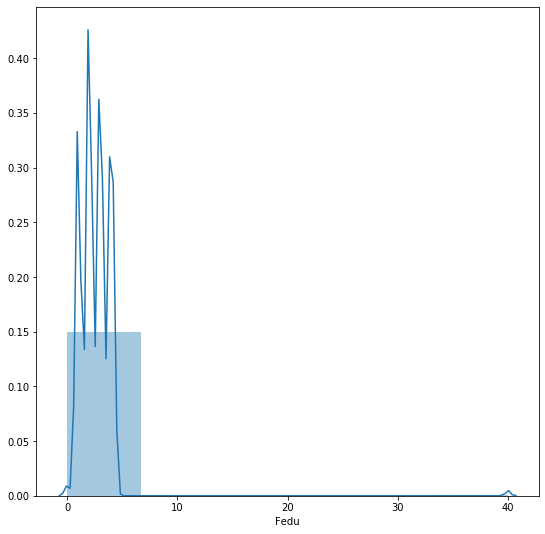

In [155]:
plot_feature('Fedu')

In [160]:
print_feature_stats('Fedu')

**Обзор признака**

----------------------------------------
Распределение значений


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

----------------------------------------
Уникальных значений - 6
----------------------------------------
Количество пропусков - 24
----------------------------------------
Границы выбросов [0.5, 4.5].
Найдено выбросов: 3


Найдено три выброса, два из которых не учитываем, так как 0 имеет конкретное значение "нет образования". А выброс со значением 40 - ошибка. По распределению значений логичнее отнести выброс к значению 4, но мы избавимся от него.

In [ ]:
index = data.Fedu[data.Fedu == 40].index[0]
data.Fedu[index] = np.nan

Посмотрим на признак еще раз

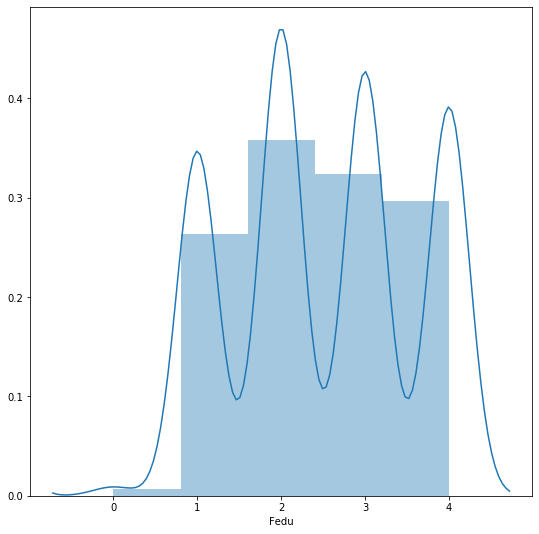

In [191]:
plot_feature('Fedu')

In [192]:
print_feature_stats('Fedu')

**Обзор признака**

----------------------------------------
Распределение значений


2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 25
----------------------------------------
Границы выбросов [0.5, 4.5].
Найдено выбросов: 2


Итого:
* половина отцов имеют высшее или среднее специальное образование
* отцы двоих учащихся не имеют образования
* начальное образование имеют вторая половина отцов

Посмотрим на среднее и медиану результатов экзамена по математике по двум группам учащихся:
1. отцы имеют высшее или среднее специальное образование

In [198]:
print(data[data.Fedu >= 3].score.mean())
print(data[data.Fedu >= 3].score.median())

54.83516483516483
55.0


2. отцы не имеют образования или имеют начальное

In [200]:
print(data[data.Fedu < 3].score.mean())
print(data[data.Fedu < 3].score.median())

49.67032967032967
50.0


Результаты практически не отличаются от результатов по предыдущему признаку.
Посмотрим на распределение образований обоих родителей

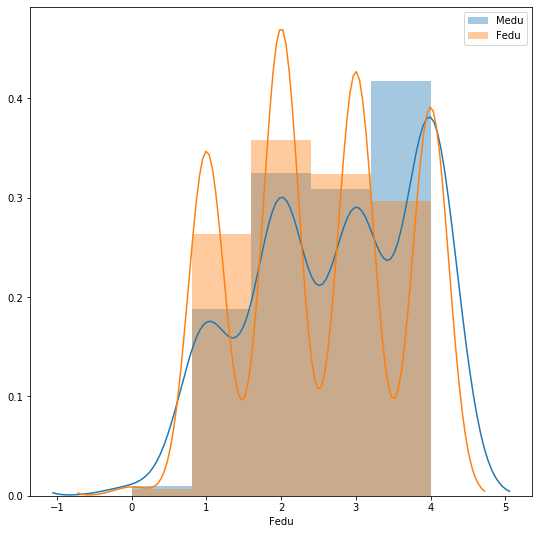

In [195]:
sns.distplot(data.Medu, label='Medu', bins=5)
sns.distplot(data.Fedu, label='Fedu', bins=5)    
plt.legend()

В целом по выборке матери получали высшее образование чаще отцов, а отцы чаще имеют начальное образование и немного чаще среднее специальное.

#### Признак Mjob 

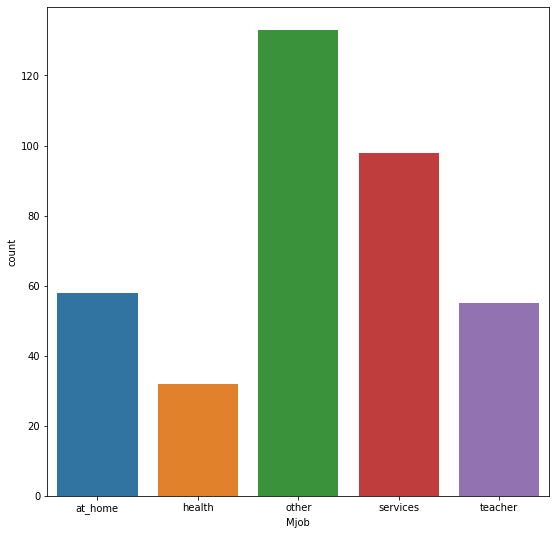

In [201]:
plot_feature('Mjob')

In [202]:
print_feature_stats('Mjob')

**Обзор признака**

----------------------------------------
Распределение значений


other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 19


Большинство матерей занято в различных сферах деятельности. Из представленных сфер больше всего работников гос.органов, что логично, так как различных государственных структур много. 21% процент работаютщих матерей являются учителями, что может сказываться на оценке экзаменов учащихся. Также 15% матерей среди всех наблюдений не работают.

#### Признак Fjob 

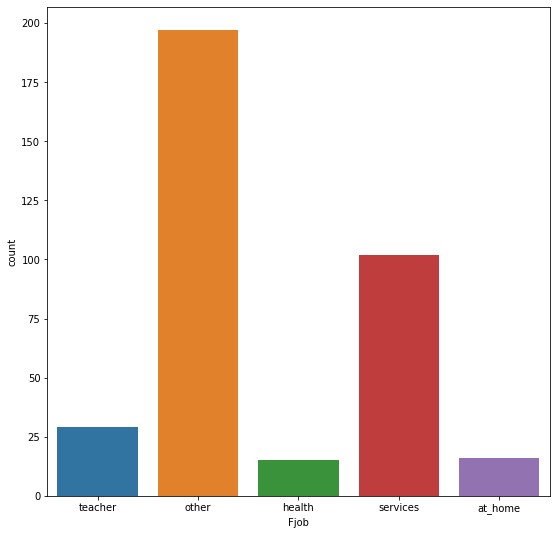

In [205]:
plot_feature('Fjob')

In [206]:
print_feature_stats('Fjob')

**Обзор признака**

----------------------------------------
Распределение значений


other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 36


Отцы в большинстве также заняты в различных сферах деятельности, 102 человека заняты на гос.службе. В целом видно, что мужчины гораздо реже сидят без работы и заняты, скорее всего, в традиционно мужских сферах деятельности (водители, строители, рабочие производства). Большая доля незанятых матерей, очевидно, связана с семейными/домашними делами. 

#### Признак reason 

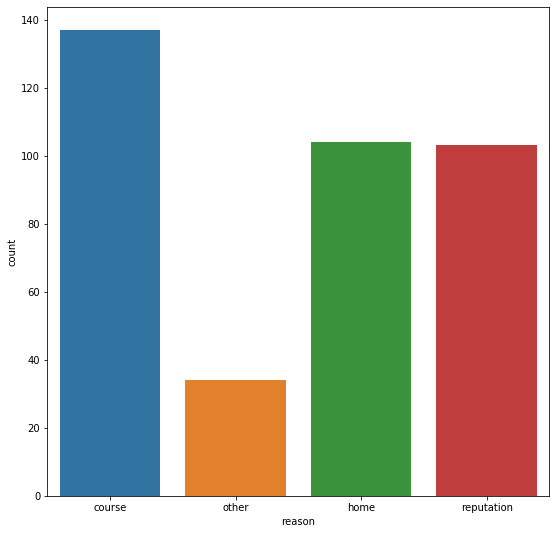

In [207]:
plot_feature('reason')

In [208]:
print_feature_stats('reason')

**Обзор признака**

----------------------------------------
Распределение значений


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

----------------------------------------
Уникальных значений - 4
----------------------------------------
Количество пропусков - 17


Большая часть учеников и родителей выбирают школу в первую очередь по образовательной программе, не менее важны близость к дому и репутация. Других причин выбора значительно меньше.

#### Признак guardian 

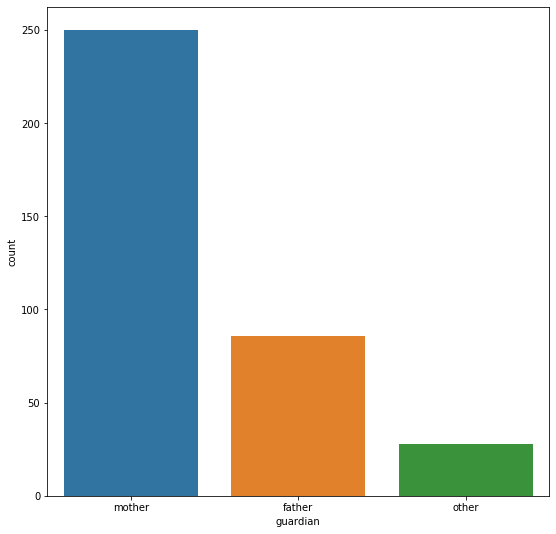

In [209]:
plot_feature('guardian')

In [210]:
print_feature_stats('guardian')

**Обзор признака**

----------------------------------------
Распределение значений


mother    250
father     86
other      28
Name: guardian, dtype: int64

----------------------------------------
Уникальных значений - 3
----------------------------------------
Количество пропусков - 31


В подавляющем большинстве случаев опекунами являются матери, реже - отцы, еще реже - другие люди. Не совсем понятный мне признак. Если углубиться, то опекуном может стать лицо, одобренное соответствующими органами, при этом не обязательно у ребенка может не быть кровных родителей. Опекун при этом имеет практически все права родителя. Нам известны сведения об образовании матери, ее работе, отношениях с отцом. Выходит, что мать является одновременно и родителем, и опекуном? Видимо, такое может быть.

#### Признак traveltime 

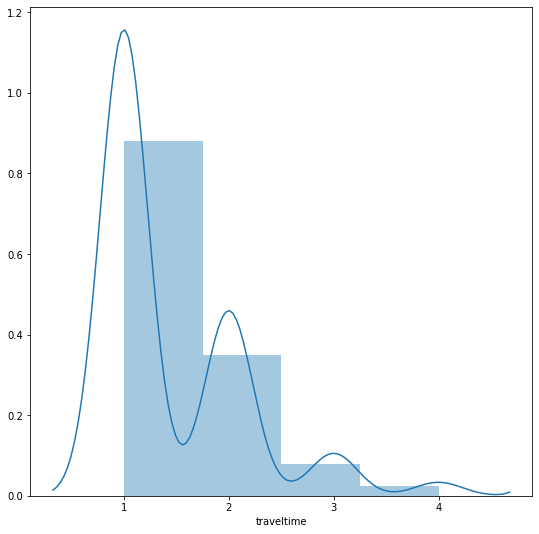

In [211]:
plot_feature('traveltime')

In [212]:
print_feature_stats('traveltime')

**Обзор признака**

----------------------------------------
Распределение значений


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

----------------------------------------
Уникальных значений - 4
----------------------------------------
Количество пропусков - 28
----------------------------------------
Границы выбросов [-0.5, 3.5].
Найдено выбросов: 7


Как видно на графике, путь до школы большинства учеников не превышает 15 минут, что соответсвует высокому значению причины выбора школы "близость к дому". Значит, не только образовательная программа важна для учеников и родителей, но и близость школы, так как близкая дорога менее опасна, что в целом соответвует реалиям. 96 учеников тратят на путь от 15 до 30 минут, думаю, из-за более удаленного месторасположения жилья. 29 учеников тратят на дорогу от получаса и более, что может означать, что эти ученики живут за городом. Найдено 7 выбросов, но мы их проигнорируем, поскольку значение признака 4 имеет конкретное значение.

#### Признак studytime 

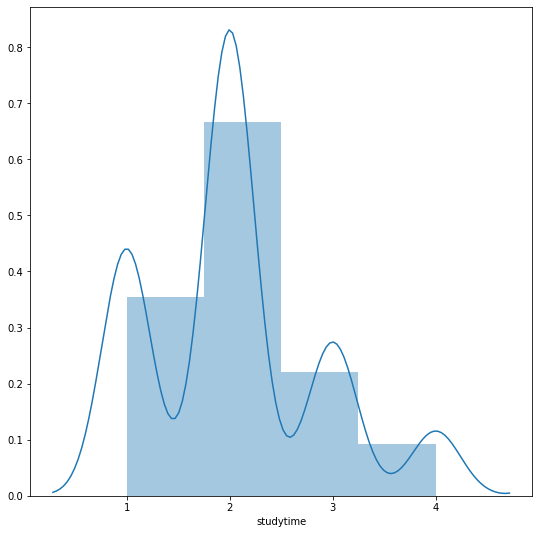

In [213]:
plot_feature('studytime')

In [214]:
print_feature_stats('studytime')

**Обзор признака**

----------------------------------------
Распределение значений


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

----------------------------------------
Уникальных значений - 4
----------------------------------------
Количество пропусков - 7
----------------------------------------
Границы выбросов [-0.5, 3.5].
Найдено выбросов: 27


76.5% учеников тратят на дополнительное обучение от менее двух до 5 часов в неделю, остальные тратят 5 и более часов. Найдено 7 выбросов, но мы их проигнорируем, поскольку значение признака 4 имеет конкретное значение. Интересно посмотреть на итоговую оценку тех учеников, которые тратят много времени на дополнительное обучение.

In [217]:
print(data.query('studytime >= 3').score.mean())
print(data.query('studytime < 3').score.mean())

57.333333333333336
50.342465753424655


Видим, что у таких учеников средний бал достаточно выше, чем у тех, кто тратит меньше времени на дополнительное обучение.

#### Признак failures 

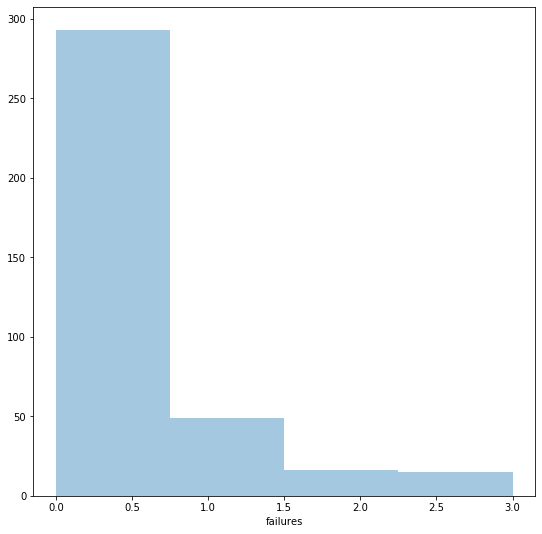

In [224]:
plot_feature('failures')

In [219]:
print_feature_stats('failures')

**Обзор признака**

----------------------------------------
Распределение значений


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

----------------------------------------
Уникальных значений - 4
----------------------------------------
Количество пропусков - 22
----------------------------------------
Границы выбросов [0.0, 0.0].
Найдено выбросов: 80


In [225]:
data.loc[:,'failures'].describe()

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Данный признак по условию задачи принимает значения: n, если 1<=n<3, иначе 4. Но в распределении наблюдается сильный дисбаланс в сторону значения 0 и отсутствие значения 4, в следствие чего границы интерквартильного расстояния равны нулю и отличные от нуля значения признака помечены как выбросы. Считаю, что эти выбросы стоит игнорировать, так как значения не являются экстремальными. Значение 0 интерпритирую как отсуствие неудач.

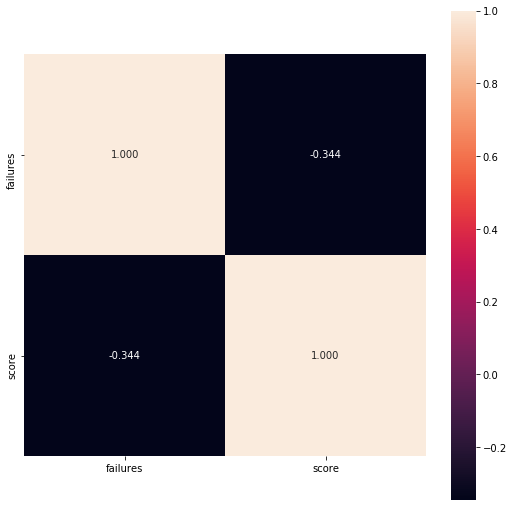

In [227]:
sns.heatmap(data[['failures', 'score']].corr(), annot=True, square=True, fmt='.3f')

Между этим признаком и целевой переменной наблюдается слабая отрицательная корреляция.

#### Признак schoolsup 

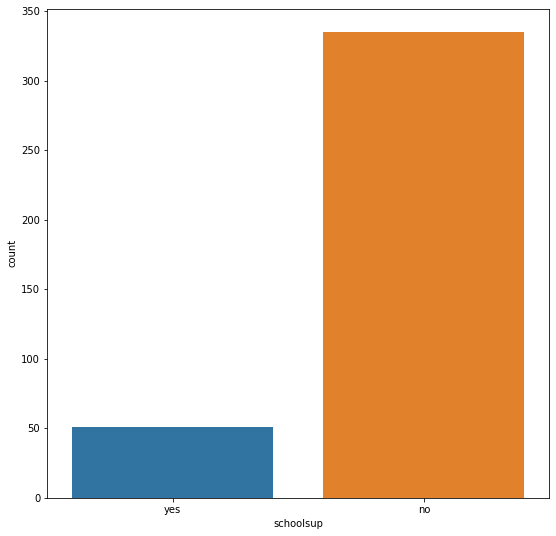

In [233]:
plot_feature('schoolsup')

In [234]:
print_feature_stats('schoolsup')

**Обзор признака**

----------------------------------------
Распределение значений


no     335
yes     51
Name: schoolsup, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 9


Бинарный признак дополнительной образовательной поддержки. Большинство учеников её не имеет.

#### Признак famsup 

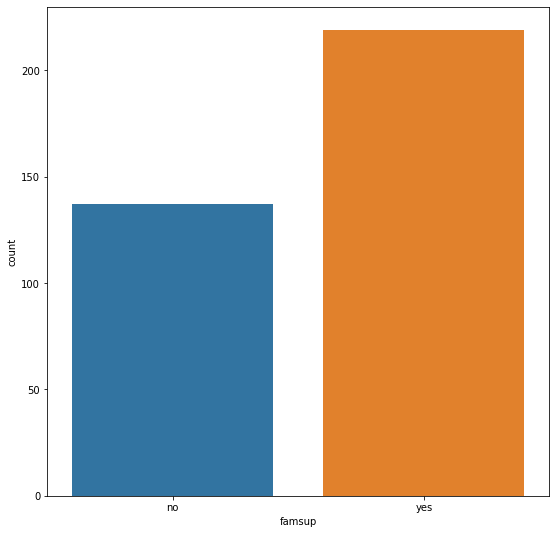

In [235]:
plot_feature('famsup')

In [237]:
print_feature_stats('famsup')

**Обзор признака**

----------------------------------------
Распределение значений


yes    219
no     137
Name: famsup, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 39


Бинарный признак семейной образовательной поддержки. Здесь большее количество учеников имеют её.

#### Признак paid

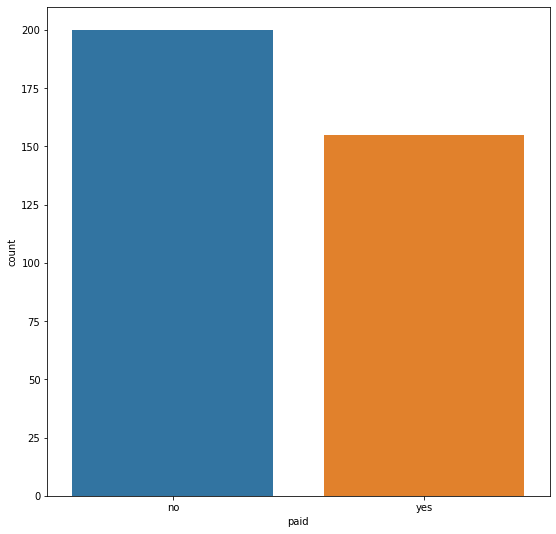

In [238]:
plot_feature('paid')

In [239]:
print_feature_stats('paid')

**Обзор признака**

----------------------------------------
Распределение значений


no     200
yes    155
Name: paid, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 40


Бинарный признак платных дополнительных занятий по математике. 56% учеников не проходили такие занятия. Можем посмотреть, влияют ли эти занятия на общий бал на экзамене.

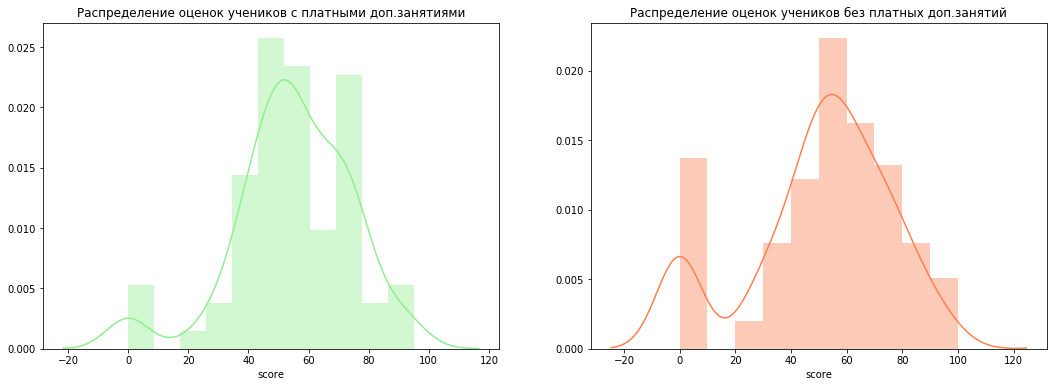

In [243]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.distplot(data[data.paid == 'yes']['score'], color='lightgreen', ax=ax)
ax.set_title('Распределение оценок учеников с платными доп.занятиями')

ax = f.add_subplot(122)
sns.distplot(data[data.paid == 'no']['score'], color='coral', ax=ax)
ax.set_title('Распределение оценок учеников без платных доп.занятий')

plt.show()

In [244]:
data[data.paid == 'yes'].score.value_counts()

50.0    23
55.0    22
75.0    17
40.0    17
70.0    13
65.0    13
45.0    11
60.0     9
0.0      7
90.0     5
30.0     5
80.0     4
95.0     2
35.0     2
20.0     1
25.0     1
85.0     1
Name: score, dtype: int64

In [245]:
data[data.paid == 'no'].score.value_counts()

0.0      27
50.0     24
55.0     20
60.0     19
70.0     14
45.0     14
65.0     13
75.0     12
80.0     11
40.0     10
30.0      9
35.0      6
90.0      6
25.0      4
85.0      4
95.0      3
100.0     1
Name: score, dtype: int64

Видим по данным, что среди учеников, которые брали доп.занятия, почти в 4 раза меньше тех, кто набрал 0 баллов по сравнению с учениками, которые не брали такие занятия. Значит доп.занятия приносят пользу в этом аспекте. С другой стороны, что интересно, количество учеников, которые набрали высокие баллы, выше в правой группе. Один ученик даже набрал максимальный балл 100, что ставит под сомнение эффективность платных доп.занятий в этом аспекте.

#### Признак activities 

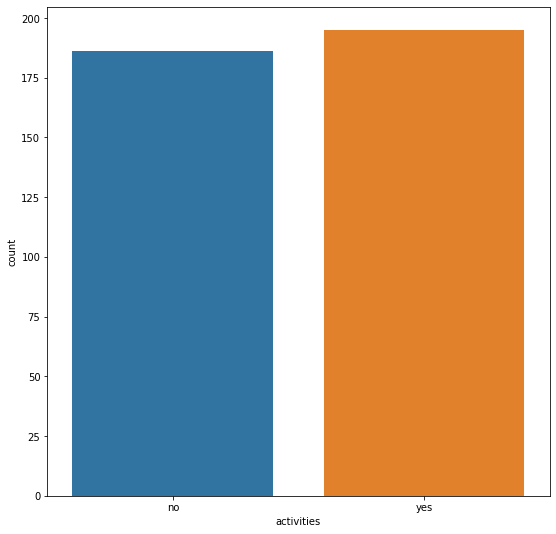

In [246]:
plot_feature('activities')

In [247]:
print_feature_stats('activities')

**Обзор признака**

----------------------------------------
Распределение значений


yes    195
no     186
Name: activities, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 14


Бинарный признак дополнительных внеучебных занятий. Насколько понимаю значение признака - это хобби или дополнительные увлечения. Здесь половина учеников не занимается ничем, вторая половина имеет какие-то доп.занятия.

#### Признак nursery 

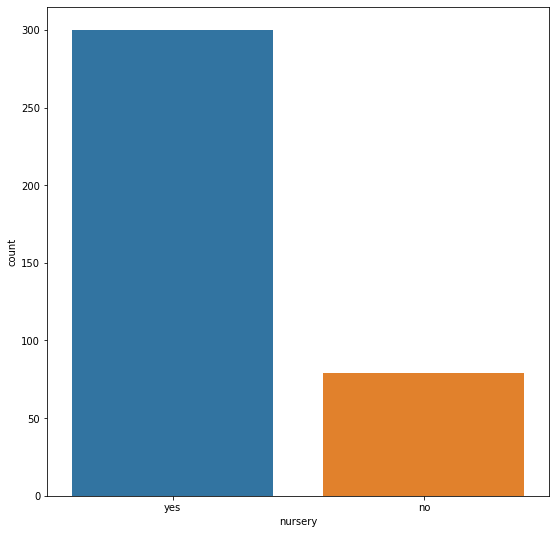

In [248]:
plot_feature('nursery')

In [249]:
print_feature_stats('nursery')

**Обзор признака**

----------------------------------------
Распределение значений


yes    300
no      79
Name: nursery, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 16


Бинарный признак посещения детского сада. Гораздо большее число учеников посещали его. 79 учеников - нет, возможно, обучались дома.

#### Признак higher

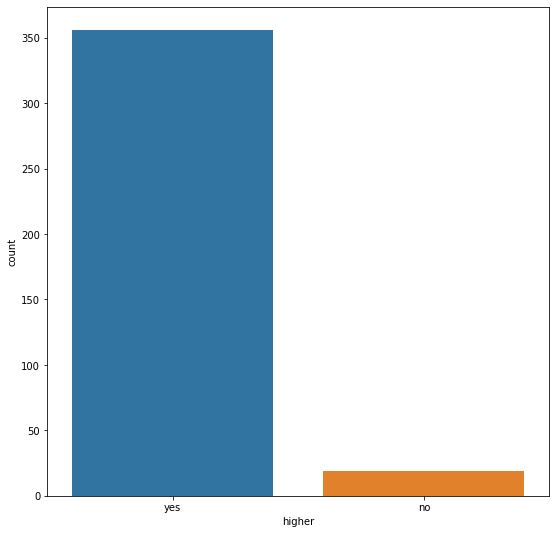

In [250]:
plot_feature('higher')

In [251]:
print_feature_stats('higher')

**Обзор признака**

----------------------------------------
Распределение значений


yes    356
no      19
Name: higher, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 20


Подавляющее число учеников хочет получить высшее образование. А если посмотреть на распределение оценок?

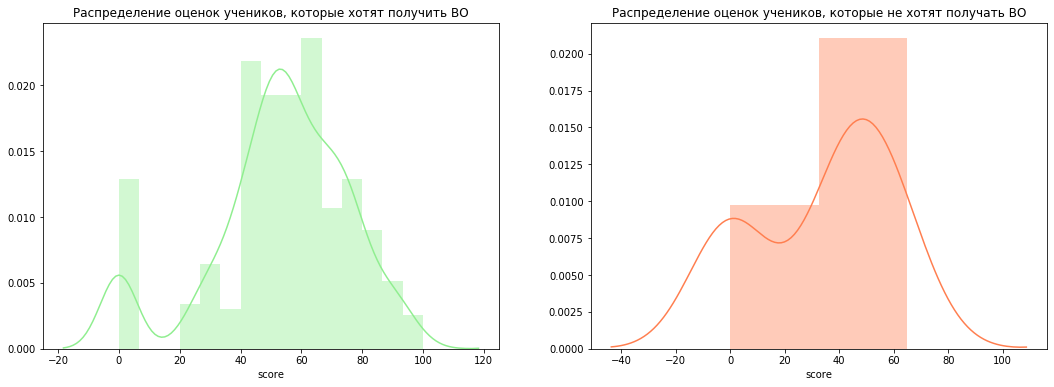

In [252]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.distplot(data[data.higher == 'yes']['score'], color='lightgreen', ax=ax)
ax.set_title('Распределение оценок учеников, которые хотят получить ВО')

ax = f.add_subplot(122)
sns.distplot(data[data.higher == 'no']['score'], color='coral', ax=ax)
ax.set_title('Распределение оценок учеников, которые не хотят получать ВО')

plt.show()

Как видим, ученики, которые не хотят получать ВО, не стремятся получить и высокий балл за экзамен :)
Но и среди тех, кто хочет, довольно много тех, кто не сможет поступить в ВУЗ, по крайней мере с первой попытки :)

#### Признак internet 

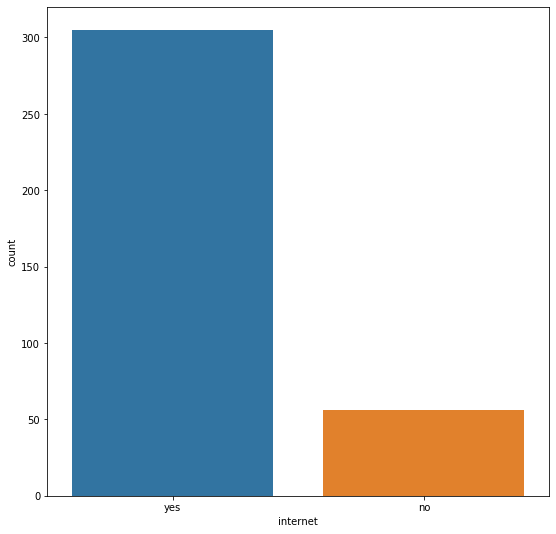

In [253]:
plot_feature('internet')

In [254]:
print_feature_stats('internet')

**Обзор признака**

----------------------------------------
Распределение значений


yes    305
no      56
Name: internet, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 34


Немного удивительно, но 1/6 часть учеников не имеет выхода в интернет.

#### Признак romantic 

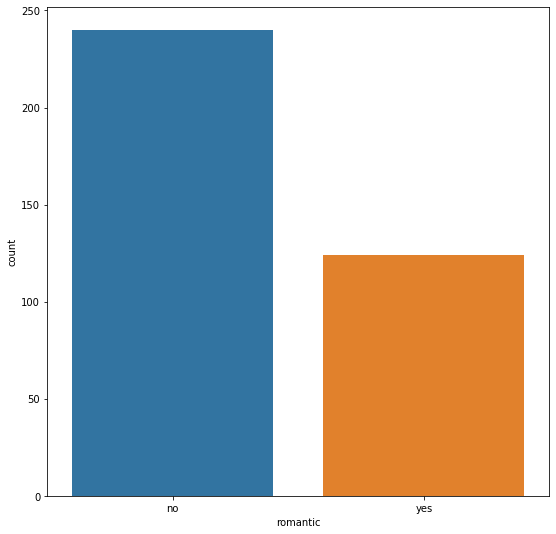

In [256]:
plot_feature('romantic')

In [257]:
print_feature_stats('romantic')

**Обзор признака**

----------------------------------------
Распределение значений


no     240
yes    124
Name: romantic, dtype: int64

----------------------------------------
Уникальных значений - 2
----------------------------------------
Количество пропусков - 31


Большая часть учеников не состоит в романтических отношениях. Интересно, влияет ли влюбленность на учебу и экзамены? 

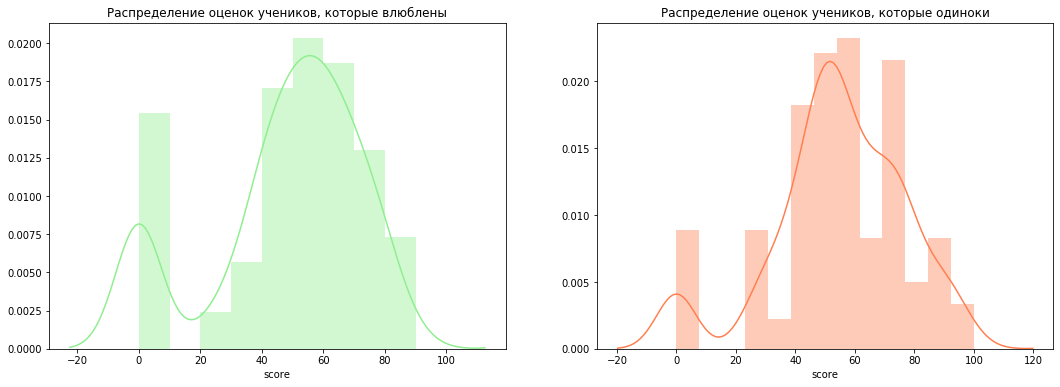

In [259]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.distplot(data[data.romantic == 'yes']['score'], color='lightgreen', ax=ax)
ax.set_title('Распределение оценок учеников, которые влюблены')

ax = f.add_subplot(122)
sns.distplot(data[data.romantic == 'no']['score'], color='coral', ax=ax)
ax.set_title('Распределение оценок учеников, которые одиноки')

plt.show()

Влюбленные ученики чаще получилали 0 баллов, максимальные оценки у них ниже. Можно сделать вывод, что какое-то влияние любви на учебу присутствует.

####  Признак famrel

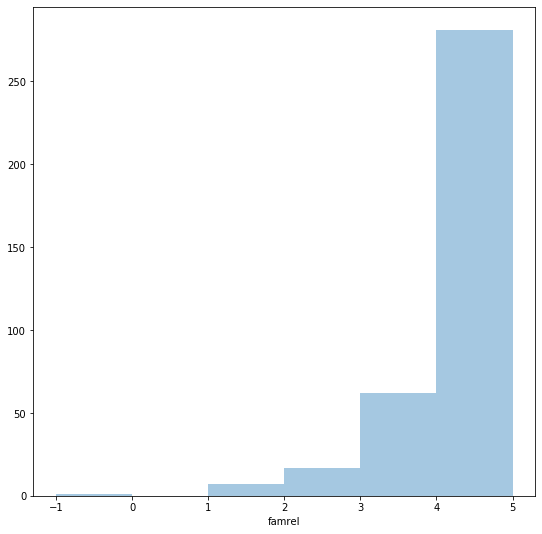

In [260]:
plot_feature('famrel')

In [261]:
print_feature_stats('famrel')

**Обзор признака**

----------------------------------------
Распределение значений


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

----------------------------------------
Уникальных значений - 6
----------------------------------------
Количество пропусков - 27
----------------------------------------
Границы выбросов [2.5, 6.5].
Найдено выбросов: 25


Видим ошибочное значение -1, уберем его.

In [ ]:
index = data.famrel[data.famrel == -1].index[0]
data.famrel[index] = np.nan

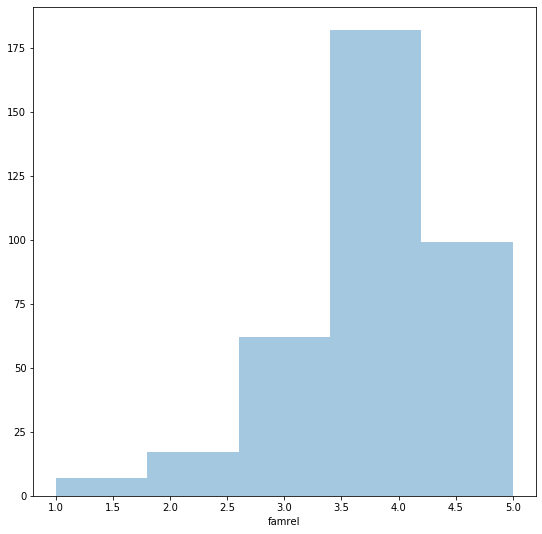

In [263]:
plot_feature('famrel')

In [264]:
print_feature_stats('famrel')

**Обзор признака**

----------------------------------------
Распределение значений


4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 28
----------------------------------------
Границы выбросов [2.5, 6.5].
Найдено выбросов: 24


Видим, что в большинстве отношения в семье хорошие или средние. Найдено 24 выброса, но мы их игнорируем, так как значения 1 и 2 являются не являются экстремальными.

#### Признак freetime

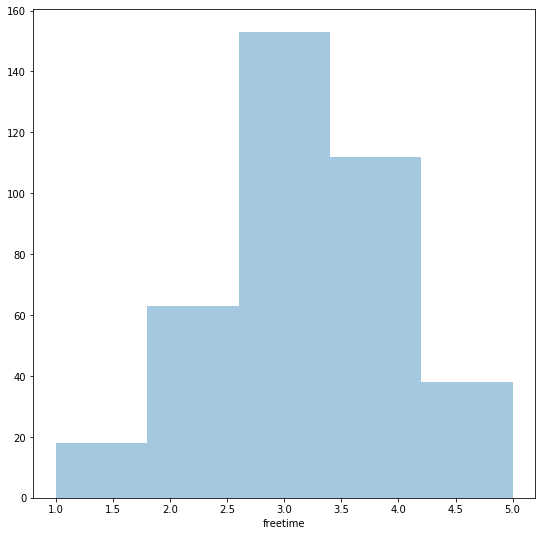

In [265]:
plot_feature('freetime')

In [266]:
print_feature_stats('freetime')

**Обзор признака**

----------------------------------------
Распределение значений


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 11
----------------------------------------
Границы выбросов [1.5, 5.5].
Найдено выбросов: 18


Распределение признака очень близко к нормальному. В целом, большинство учеников имеет много свободного времени.

#### Признак goout 

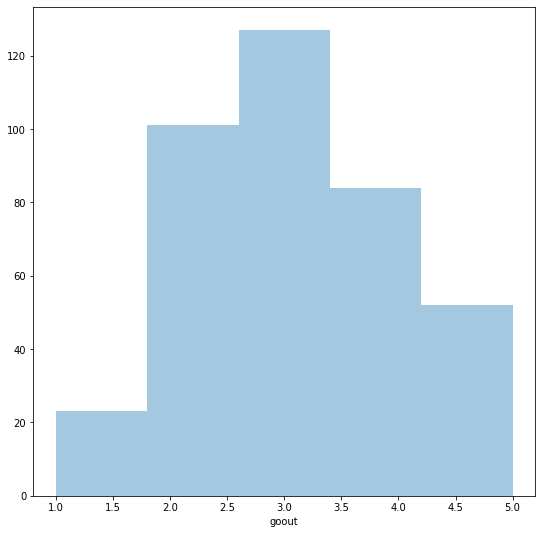

In [269]:
plot_feature('goout')

In [270]:
print_feature_stats('goout')

**Обзор признака**

----------------------------------------
Распределение значений


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 8
----------------------------------------
Границы выбросов [-1.0, 7.0].
Найдено выбросов: 0


Распределение признака очень близко к нормальному. Малая доля учеников (6%) проводит мало времени с друзьями, что может говорить об их занятости другими делами, возможно связанных с учебой. Остальные учящиеся проводят больше времени с друзьями.

#### Признак health

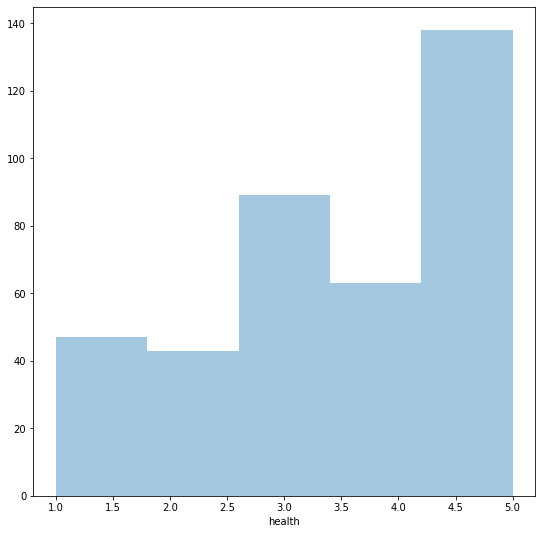

In [271]:
plot_feature('health')

In [272]:
print_feature_stats('health')

**Обзор признака**

----------------------------------------
Распределение значений


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

----------------------------------------
Уникальных значений - 5
----------------------------------------
Количество пропусков - 15
----------------------------------------
Границы выбросов [0.0, 8.0].
Найдено выбросов: 0


90 учеников имеют слабое здоровье (считаю, что слабое здоровье выражено значениями 1 и 2), что составляет 23.6% от общего числа наблюдений. На графике виден восходящий тренд, говорящий о том, что большинство учеников имеют хорошее здоровье. Посмотрим, влияет ли состояние здоровья на успеваемость.

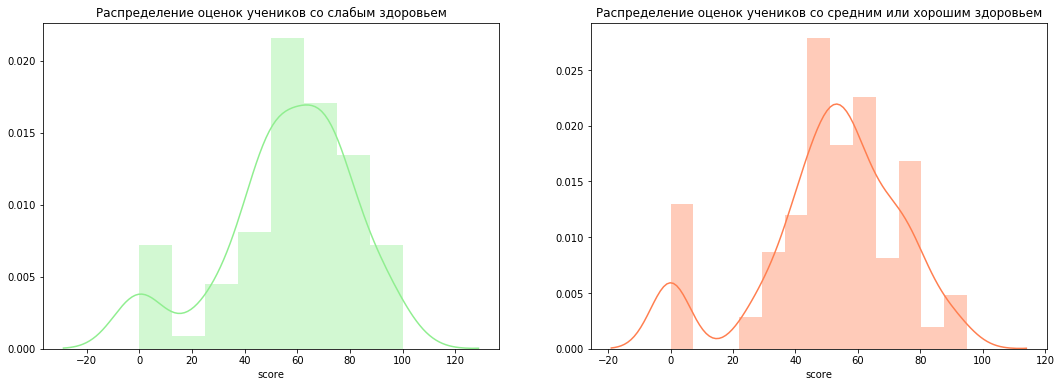

In [274]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.distplot(data[data.health <= 2]['score'], color='lightgreen', ax=ax)
ax.set_title('Распределение оценок учеников со слабым здоровьем')

ax = f.add_subplot(122)
sns.distplot(data[data.health > 2]['score'], color='coral', ax=ax)
ax.set_title('Распределение оценок учеников со средним или хорошим здоровьем')

plt.show()

По графикам можно сделать вывод, что ученики со слабым здоровьем имеют результаты ничуть не хуже, чем у учеников с хорошим здоровьем, а в некоторых местах и лучше. Например, меньше тех, кто получил 0 баллов. Единственная максимальная оценка принадлежит ученику со слабым здоровьем.

#### Признак absences

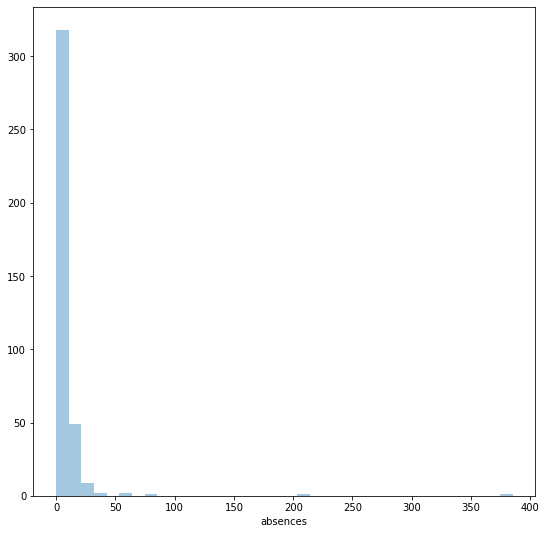

In [318]:
plot_feature('absences')

In [319]:
print_feature_stats('absences')

**Обзор признака**

----------------------------------------
Распределение значений


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

----------------------------------------
Уникальных значений - 36
----------------------------------------
Количество пропусков - 12
----------------------------------------
Границы выбросов [-12.0, 20.0].
Найдено выбросов: 17


В распределении признака наблюдаются экстримальные значения, такие как 212 и 385. В тоже время очень мало учеников, которые пропускали много занятий - после значения 22 (встречается 3 раза), бОльшие значения встречаются единожды, но также единожды встречаются и значения, которые меньше. Оставим в качестве правой границы выбросов значение 40, остальные будем считать выбросами и исключим.

In [320]:
data['absences'] = remove_anomalies('absences', right_bound=40)

После удаления аномалий посмотрим на распределение еще раз. Выглядит гораздо лучше.

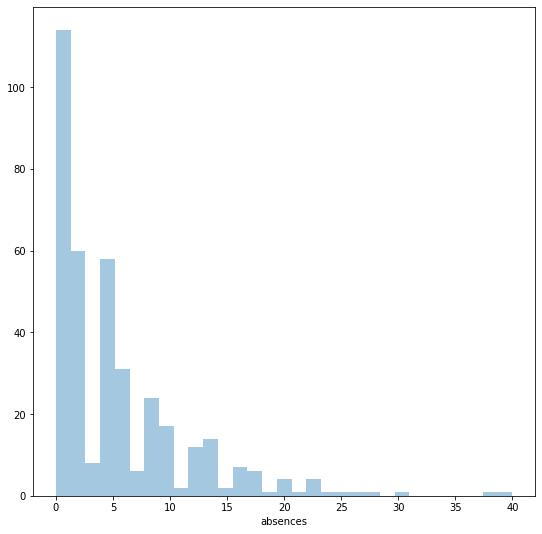

In [321]:
plot_feature('absences')

In [322]:
print_feature_stats('absences')

**Обзор признака**

----------------------------------------
Распределение значений


0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
14.0     12
12.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
25.0      1
17.0      1
26.0      1
24.0      1
23.0      1
21.0      1
30.0      1
19.0      1
38.0      1
40.0      1
28.0      1
Name: absences, dtype: int64

----------------------------------------
Уникальных значений - 31
----------------------------------------
Количество пропусков - 17
----------------------------------------
Границы выбросов [-12.0, 20.0].
Найдено выбросов: 12


#### Признак  studytime, granular

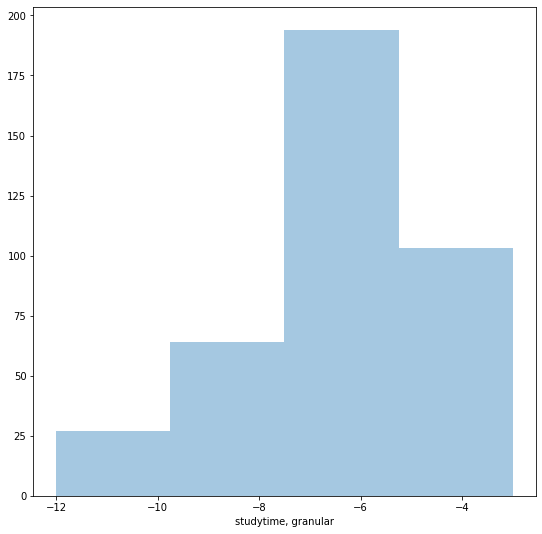

In [323]:
plot_feature("studytime, granular")

In [324]:
print_feature_stats("studytime, granular")

**Обзор признака**

----------------------------------------
Распределение значений


-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

----------------------------------------
Уникальных значений - 4
----------------------------------------
Количество пропусков - 7
----------------------------------------
Границы выбросов [-10.5, 1.5].
Найдено выбросов: 27


Признак принимает отрицательные значения от -12 до -3. В названии встречается признак studytime, который мы исследовали раньше. Посмотрим какая между ними взаимосвязь. Для этого построим графики обоих признаков, посмотрим на матрицу корреляций и уникальные значения.

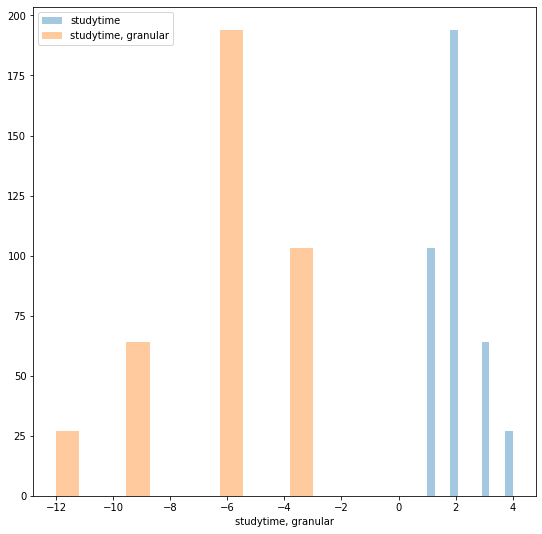

In [326]:
sns.distplot(a=data['studytime'], label='studytime', 
             kde=False)
sns.distplot(a=data["studytime, granular"], 
             label="studytime, granular", kde=False)
plt.legend()

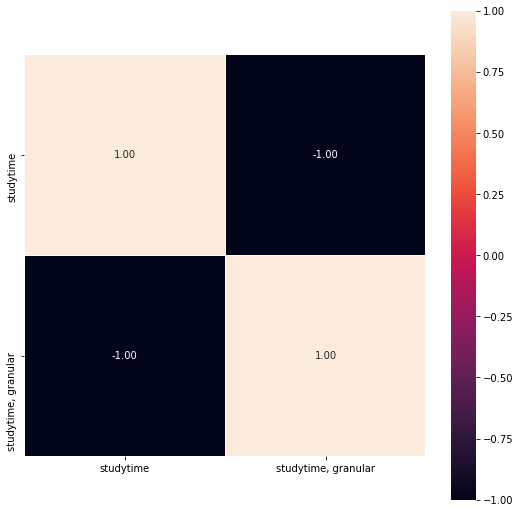

In [327]:
sns.heatmap(data[['studytime', "studytime, granular"]].corr(),
            square=True, fmt='.2f', linewidths=0.1, 
            annot=True)

In [331]:
print(data['studytime'].unique())
print(data["studytime, granular"].unique())

[ 2.  3.  1. nan  4.]
[ -6.  -9.  -3.  nan -12.]


В итоге видим, что количество значений одинаковое, максимальную отрицательную корреляцию. По уникальным значениям видно, что признак studytime, granular получен умножением значений признака studytime на -3. Избавимся от этого признака, так как он является излишним.

In [332]:
data.drop("studytime, granular", axis=1, inplace=True)

#### Признак score 

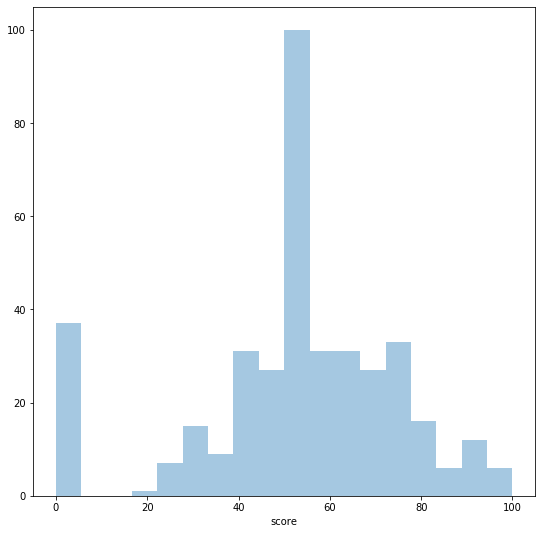

In [333]:
plot_feature('score')

In [334]:
print_feature_stats('score')

**Обзор признака**

----------------------------------------
Распределение значений


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

----------------------------------------
Уникальных значений - 18
----------------------------------------
Количество пропусков - 6
----------------------------------------
Границы выбросов [-5.0, 115.0].
Найдено выбросов: 0


Целевой признак - оценка на экзамене. Пропусков - 6, всего разных проставленных оценок - 18. Выбросов нет. Ноль выбивается от остального распределения, но при это он не считается выбросом, встречается достаточно часто, да и по балльной шкале ноль имеет место быть. Видимо, это случаи либо неявки на экзамен, либо полный провал его сдачи. Считаю, что с нулем дополнительных действий производить не нужно.

#### Промежуточные выводы

Рассмотрен датасет в целом: выведены статистические характеристики количественных признаков, оценено количество пропусков. Рассмотрен каждый признак признак отдельно: выведены графики распределений и статистика, убраны выбросы там, где это необходимо (по моему рассуждению). В целом считаю, что качество данных на среднем уровне из-за пропусков. С одной стороны, нет такого признака, в котором количество пропусков очень велико и целесообразнее избавиться от него. С другой стороны, практически каждый признак имеет небольшое количество пропусков и убирать эти признаки нельзя. Нужно заполнять эти пропуски значениями. Выбросов немного, но встречаются. Далее проведем корреляционный анализ для отбора признаков для модели.

<h2 align="center">Корреляционный анализ</h2>

Построим матрицу корреляций количественных признаков в виде тепловой карты и изучим зависимости.

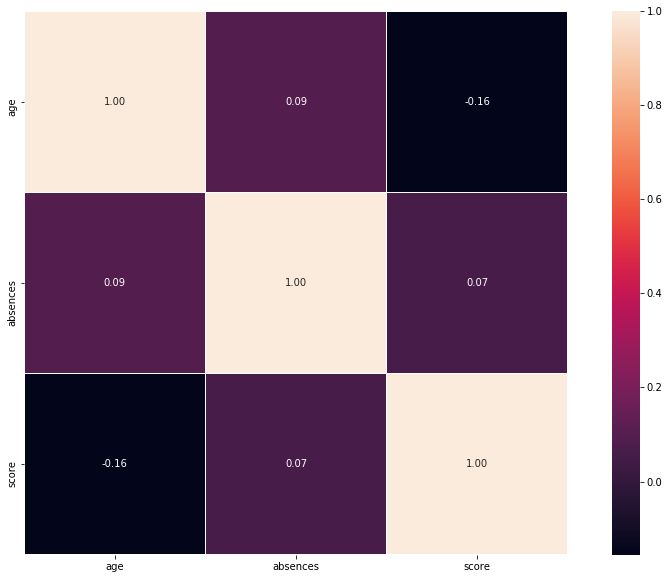

In [4]:
numeric_features = ['age', 'absences', 'score']

f = plt.figure(figsize=(16, 10))
sns.heatmap(data[numeric_features].corr(), square=True, fmt='.2f', linewidths=0.1, annot=True)

Коллениарных признаков не наблюдается. Оба признака оставим в итоговом датасете.

<h2 align="center">Анализ номинативных переменных</h2>

Для начала сгруппирем признаки по типу и количеству значений. Исходя из предварительного анализа, имеем бинарные признаки, категориальные признаки с 3, 4, 5 значениями, а также ординальные признаки. Рассмотрим каждую группу отдельно. 

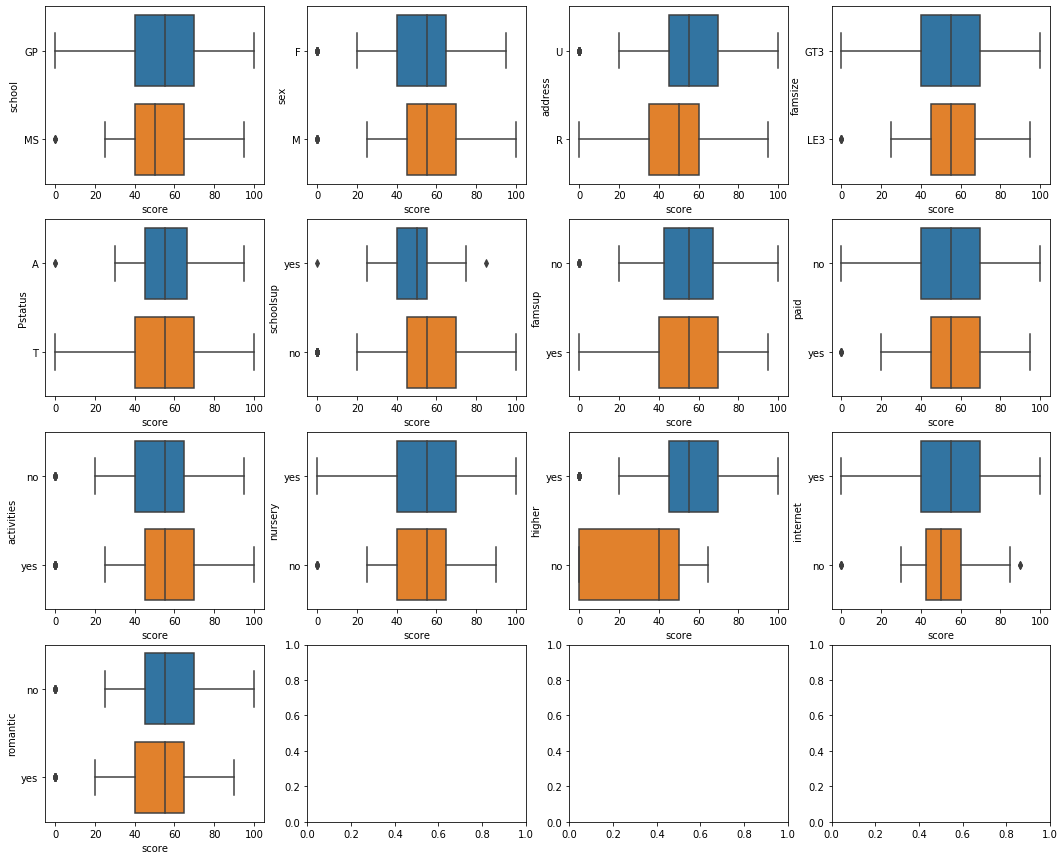

In [14]:
binary_features = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 
    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 15))

for idx, feature in enumerate(binary_features):
    sns.boxplot(x='score', y=feature, data=data, ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_xlabel('score')
    axes[idx // 4, idx % 4].set_ylabel(feature);

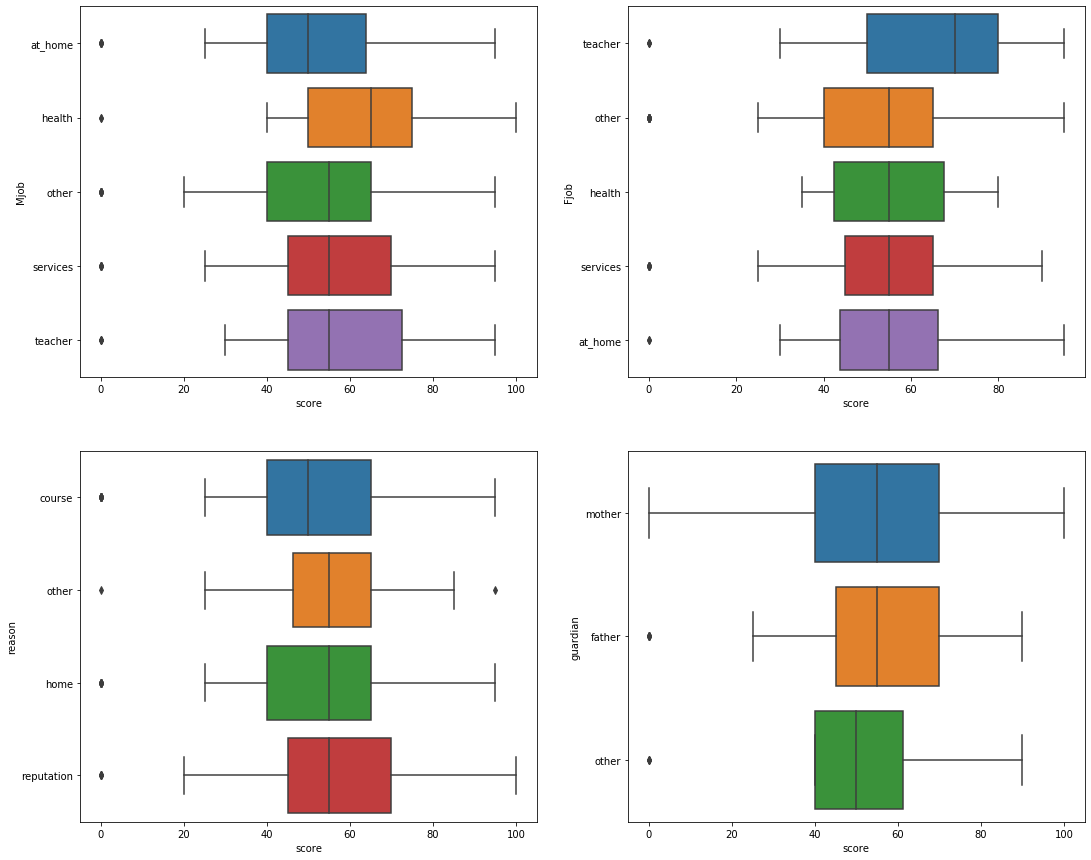

In [15]:
categorial_features = ['Mjob', 'Fjob', 'reason', 'guardian']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 15))

for idx, feature in enumerate(categorial_features):
    sns.boxplot(x='score', y=feature, data=data, ax=axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].set_xlabel('score')
    axes[idx // 2, idx % 2].set_ylabel(feature);

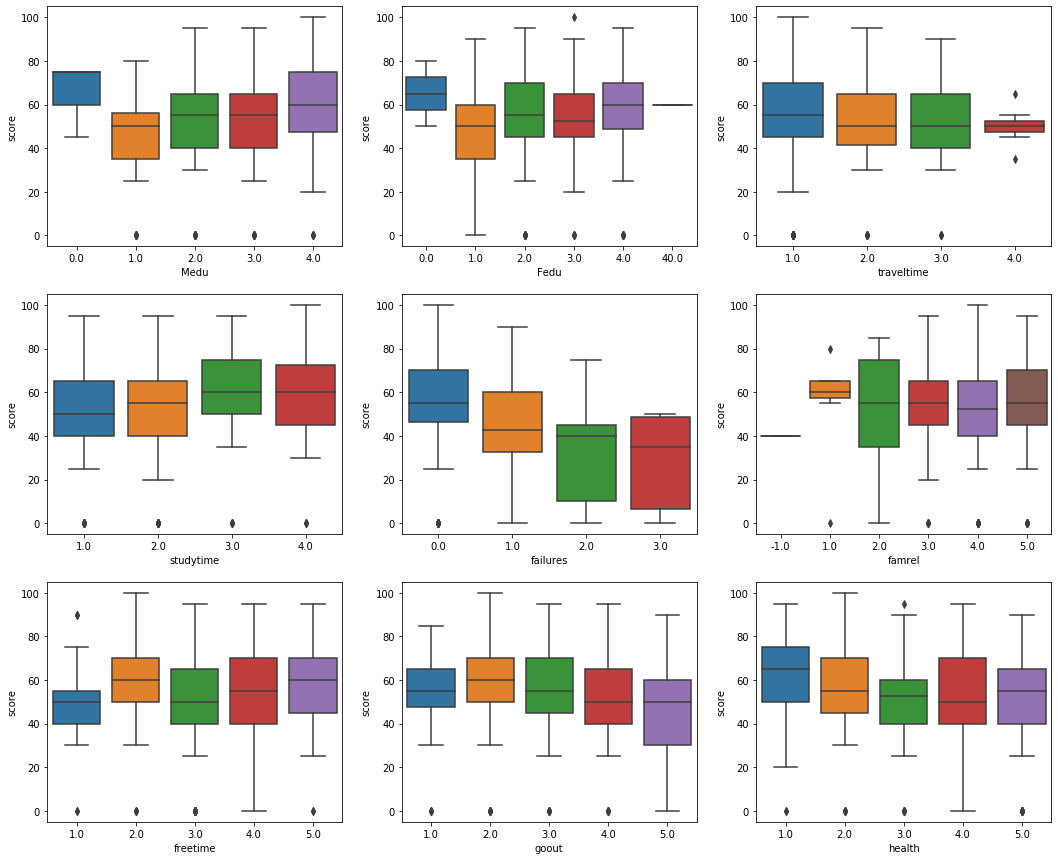

In [16]:
ordinal_features = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for idx, feature in enumerate(ordinal_features):
    sns.boxplot(x=feature, y='score', data=data, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].set_xlabel(feature)
    axes[idx // 3, idx % 3].set_ylabel('score');

На глаз наибольшее отличие видно для признаков schoolsup, higher, internet, Fjob. По моему мнению, вполне логично предположить, что дополнительное занятия, желание получить высшее образование, наличие интернета и отцы-учителя способны повлиять на итоговый результат экзамена.

Далее есть необходимость отобрать признаки, используя статистику (следуя материалам ознакомительного задания).

Итак, опираясь на ознакомительное задание, нужно оценить важность признаков, используя статистические критерии. Рассматриеватся тест Стьюдента. Этот тест сравнивает средние по двум независимым выборкам и измеряет насколько значимы различия (например, оценки за экзамен мальчиков и девочек разных этнических групп). В зависимости от значения p-value мы принимаем или отвергаем нулевую гипотезу о равности средних. Еще я попробовал применить критерий хи-квадрат, который работает с частотной таблицей. Такую таблицу мы можем сформировать для бинарного признака - для каждого значения оценки экзамена посчитать, сколько раз это значение встречается для каждого значения бинарного признака с помощью метода библиотеки Pandas crosstab. Далее мы можем получить значение p-value и проверить гипотезы:
* нулевая гипотеза - между признаком и целевой переменной нет связи
* альтернативная гипотеза - связь есть

Таким образом мы можем отобрать значимые приизнаки. Кодом ниже представлен отбор только для бинарных признаков.

In [35]:
for feature in binary_features:
    chi2_stat = chi2_contingency(pd.crosstab(data['score'], data[feature]))
    p_value = chi2_stat[1]
    
    if p_value < 0.05:
        print('Для признака {} p-value = {:.6f}. Признаки зависимы'.format(feature, p_value))
    else:
        print('Для признака {} p-value = {:.6f}. Между признаками нет связи'.format(feature, p_value))

Для признака school p-value = 0.787636. Между признаками нет связи
Для признака sex p-value = 0.290468. Между признаками нет связи
Для признака address p-value = 0.040208. Признаки зависимы
Для признака famsize p-value = 0.366744. Между признаками нет связи
Для признака Pstatus p-value = 0.524728. Между признаками нет связи
Для признака schoolsup p-value = 0.006724. Признаки зависимы
Для признака famsup p-value = 0.697150. Между признаками нет связи
Для признака paid p-value = 0.080068. Между признаками нет связи
Для признака activities p-value = 0.662483. Между признаками нет связи
Для признака nursery p-value = 0.580153. Между признаками нет связи
Для признака higher p-value = 0.143733. Между признаками нет связи
Для признака internet p-value = 0.545902. Между признаками нет связи
Для признака romantic p-value = 0.040190. Признаки зависимы


Статистика показывает, что значимы признаки address, schoolsup, romantic, но не значим признак higher, а по графику видно, что он может иметь значение. Для категориальных признаков применен OneHotEncoding, и для каждого столбца проделана таже процедура, что и для бинарного признака. Плюс учитывается поправка Бонферони.

In [58]:
for feature in other_features:
    dummies = pd.get_dummies(data[feature])
    bon_p_value = 0.05 / data[feature].nunique()
    print(feature)
    print(f'bon_p_value = {bon_p_value}')
    
    for series in dummies:
        chi2_stat = chi2_contingency(pd.crosstab(data['score'], dummies[series]))
        p_value = chi2_stat[1]
        
        if p_value < bon_p_value:
            print('Для {} p_value = {}. Признаки связаны'.format(series, p_value))
        else:
            print('Для {} p_value = {}. Признаки не связаны'.format(series, p_value))
            
    print()

Mjob
bon_p_value = 0.01
Для at_home p_value = 0.08657592156712479. Признаки не связаны
Для health p_value = 0.11476371810379395. Признаки не связаны
Для other p_value = 0.25242108113232553. Признаки не связаны
Для services p_value = 0.10056374175508923. Признаки не связаны
Для teacher p_value = 0.5057178938769805. Признаки не связаны

Fjob
bon_p_value = 0.01
Для at_home p_value = 0.9769951913467738. Признаки не связаны
Для health p_value = 0.8292912674436262. Признаки не связаны
Для other p_value = 0.2510456096653321. Признаки не связаны
Для services p_value = 0.3874439560510518. Признаки не связаны
Для teacher p_value = 0.1101868652538757. Признаки не связаны

reason
bon_p_value = 0.0125
Для course p_value = 0.7652593868632644. Признаки не связаны
Для home p_value = 0.8640193470265276. Признаки не связаны
Для other p_value = 0.29730859558789124. Признаки не связаны
Для reputation p_value = 0.21413345257474758. Признаки не связаны

guardian
bon_p_value = 0.016666666666666666
Для father

При таком подходе нет важных категориальных признаков. Далее критерий хи-квадрат применяю для ординальных признаков.

In [14]:
for feature in ordinal_features:
    chi2_stat = chi2_contingency(pd.crosstab(data['score'], data[feature]), correction=False)
    p_value = chi2_stat[1]
    
    if p_value < 0.05:
        print('Для признака {} p-value = {:.6f}. Признаки зависимы'.format(feature, p_value))
    else:
        print('Для признака {} p-value = {:.6f}. Между признаками нет связи'.format(feature, p_value))

Для признака Medu p-value = 0.342247. Между признаками нет связи
Для признака Fedu p-value = 0.702946. Между признаками нет связи
Для признака traveltime p-value = 0.976986. Между признаками нет связи
Для признака studytime p-value = 0.206957. Между признаками нет связи
Для признака failures p-value = 0.000000. Признаки зависимы
Для признака famrel p-value = 0.912823. Между признаками нет связи
Для признака freetime p-value = 0.617815. Между признаками нет связи
Для признака goout p-value = 0.323509. Между признаками нет связи
Для признака health p-value = 0.438729. Между признаками нет связи


Здесь важным получается только признак failures. Наконец применим метод подсчета теста Стьюдента и посмотрим какие признаки отобраны как важные.

In [53]:
all_nominal_features = binary_features + categorial_features + ordinal_features

In [73]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'].dropna(), 
                     data.loc[data.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
            <= 0.05 / len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [74]:
for feature in all_nominal_features:
    get_stat_dif(feature)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


Итак, после всех проведенных действий можем выбрать следующие номинативные признаки, которые оставим в датасете для построения модели: address, schoolsup, romantic, higher, Medu, Mjob, failures, goout. Кстати, критерий Стьюдента все-таки отнес признак higher к значимым, а хи-квадрат нет, но p-value близко к пороговому. Может быть, я неправильно применил эту статистику. 

<h2 align="center">Итоги и выводы</h2>

Сформируем итоговый датасет для дальнейшей работы.

In [76]:
result = data[['age', 'absences', 'address', 'schoolsup', 'romantic', 'higher', 'Medu', 'Mjob', 'failures', 'goout', 'score']]
result.sample(8)

,age,absences,address,schoolsup,romantic,higher,Medu,Mjob,failures,goout,score
323,17,1.0,U,no,no,yes,3.0,services,0.0,3.0,75.0
61,16,6.0,U,yes,yes,yes,1.0,services,0.0,5.0,55.0
293,17,6.0,R,no,NaN,yes,3.0,services,0.0,2.0,90.0
238,17,2.0,R,no,no,yes,2.0,at_home,0.0,1.0,55.0
204,16,6.0,R,no,NaN,yes,2.0,services,NaN,5.0,55.0
170,16,0.0,U,no,no,NaN,3.0,other,NaN,5.0,0.0
247,22,16.0,U,no,yes,no,3.0,services,3.0,5.0,40.0
71,15,0.0,U,no,no,yes,4.0,other,0.0,3.0,50.0


В результате EDA проведен общий анализ датасета, исследован каждый признак на предмет пустых значений, выбросов, построены графики, сделан короткий вывод. Проведен корреляционный анализ и анализ номинативных признаков с применением графиков и статистических критериев. В итоге сформирую выводы:
* в данных присутствует достаточное количество пропусков, выбор стратегии их заполнения - это отдельная тема, которую я не затрагивал
* корреляционных анализ 3 числовых признаков не выявил коллениарности
* опираясь на тренировное задание и дополнительные материалы из интернета, отобраны номинативные признаки для дальнейшего использования в модели. Разумеется, этого может быть недостаточно и необходимо проверять результаты на обучении модели